# Downsides and alternatives for PyTesseract
While PyTesseract is easy to use, quick to setup and works for a lot of usecases, it has some downsides:
- **Accuracy**: While Tesseract is generally accurate, it may not always produce the most accurate results, especially for images with low resolution or complex layouts.
- **Speed**: Tesseract can be slow, especially when processing large images or when running on lower-powered hardware.

Some alternatives could be:
- **OCRopus**: OCRopus is an open-source OCR system developed by Google that is designed to be highly modular and flexible. It is written in Python and can be used as a standalone OCR tool or as part of a larger workflow.
- **GOCR**: GOCR is an open-source OCR engine developed by the German Research Center for Artificial Intelligence (DFKI). It is fast and accurate, and supports a wide range of languages.
- **MMOCR**: MMOCR (Multi-Modal OCR) is a research project focused on developing OCR technology for digital historical documents. It is a collaboration between the University of Maryland and the National Archives and Records Administration (NARA). The goal of the project is to develop OCR technology that can accurately transcribe and classify a wide range of historical documents, including handwritten and machine-printed text, maps, and graphics.

In this notebook, I will have a brief look into MMOCR

In [24]:
import cv2
import pytesseract
from pytesseract import Output
from PIL import Image
from IPython.display import display
from mmocr.utils.ocr import MMOCR

In [12]:
# Load models into memory
ocr = MMOCR(det='TextSnake', recog=None)

load checkpoint from http path: https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_r50_fpn_unet_1200e_ctw1500-27f65b64.pth


## Comparing Results Round 1:
Taking images from day 03 - Pytesseract had massive problems with detecting text here. Let's see how MMOCR performs

**Text detection with MMOCR**

In [23]:
# Inference
results = ocr.readtext('./img2.jpeg', output='./output/', export='./output/')

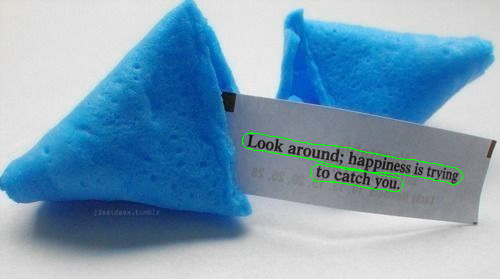

In [28]:
res = cv2.imread("./output/out_img2.png")
img = Image.fromarray(res)
display(img)

**Text detection with PyTesseract**

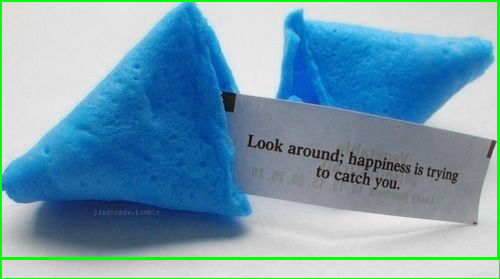

In [34]:
img = cv2.imread('img2.jpeg')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
n_boxes = len(d['level'])
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

img = Image.fromarray(img)
display(img)

**Result** - the winner is clear MMOCR!

## Comparing Results Round 2
Taking images from day 05

In [35]:
# Inference
results = ocr.readtext('./receipt.jpg', output='./output/', export='./output/')

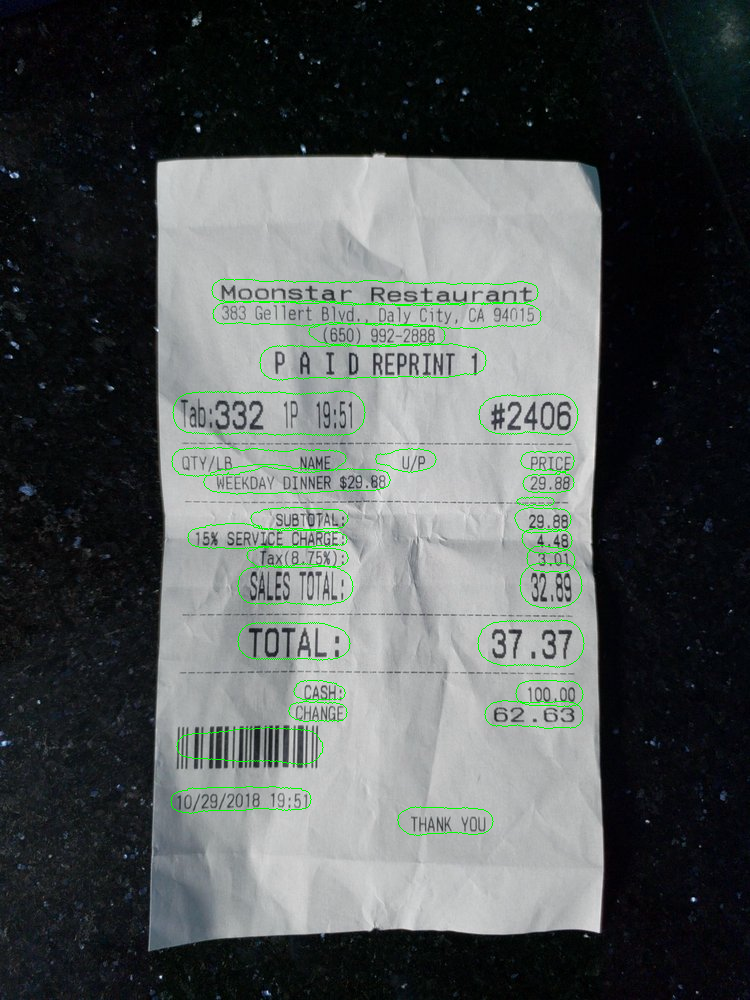

In [36]:
res = cv2.imread("./output/out_receipt.png")
img = Image.fromarray(res)
display(img)

**Text detection with PyTesseract**

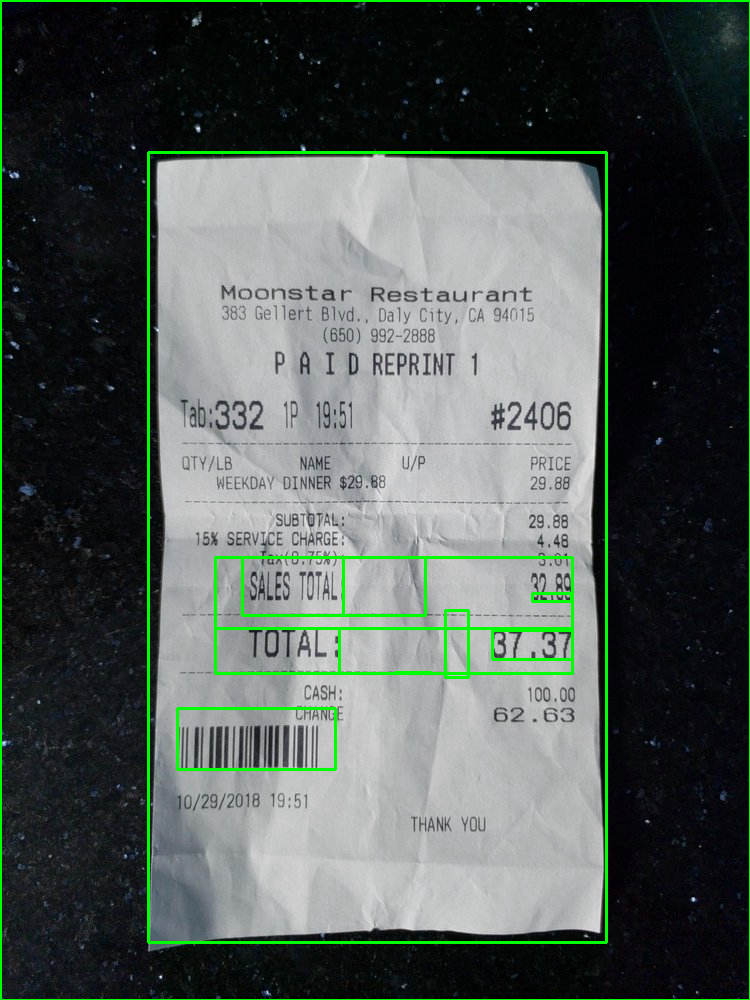

In [37]:
img = cv2.imread('receipt.jpg')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
n_boxes = len(d['level'])
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

img = Image.fromarray(img)
display(img)

**Result** The Winner is clear: **MMOCR**!